# * BRFSS Survey Data Analysis for the Year 2021-2022

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## - Load Data

In [2]:
df_BRFSS = pd.read_csv("../Data/BRFSS_preprocessed.csv")

In [3]:
df_BRFSS.head()

,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.frtres1,x.vegres1,x.frutsu1,x.vegesu1,x.frtlt1a,x.veglt1a,x.frt16a,x.veg23a,x.fruite1,x.vegete1
0,1,1,1,1192021,1,19,2021,1100,2021000001,2021000001,...,1,1,100.0,214.0,1,1,1,1,0,0
1,2,1,1,1212021,1,21,2021,1100,2021000002,2021000002,...,1,1,100.0,128.0,1,1,1,1,0,0
2,3,1,1,1212021,1,21,2021,1100,2021000003,2021000003,...,1,1,100.0,71.0,1,2,1,1,0,0
3,4,1,1,1172021,1,17,2021,1100,2021000004,2021000004,...,1,1,114.0,165.0,1,1,1,1,0,0
4,5,1,1,1152021,1,15,2021,1100,2021000005,2021000005,...,1,1,100.0,258.0,1,1,1,1,0,0


## - Dataset Details

In [4]:
print('Total Records:', df_BRFSS.shape[0])
print('Total Columns:', df_BRFSS.shape[1])

Total Records: 438693
Total Columns: 304


In [5]:
print('\nColumn Names:\n', list(df_BRFSS.columns))


Column Names:
 ['Unnamed: 0', 'x.state', 'fmonth', 'idate', 'imonth', 'iday', 'iyear', 'dispcode', 'seqno', 'x.psu', 'ctelenm1', 'pvtresd1', 'colghous', 'statere1', 'celphon1', 'ladult1', 'colgsex', 'numadult', 'landsex', 'nummen', 'numwomen', 'respslct', 'safetime', 'ctelnum1', 'cellfon5', 'cadult1', 'cellsex', 'pvtresd3', 'cclghous', 'cstate1', 'landline', 'hhadult', 'sexvar', 'genhlth', 'physhlth', 'menthlth', 'poorhlth', 'priminsr', 'persdoc3', 'medcost1', 'checkup1', 'exerany2', 'bphigh6', 'bpmeds', 'cholchk3', 'toldhi3', 'cholmed3', 'cvdinfr4', 'cvdcrhd4', 'cvdstrk3', 'asthma3', 'asthnow', 'chcscncr', 'chcocncr', 'chccopd3', 'addepev3', 'chckdny2', 'diabete4', 'diabage3', 'havarth5', 'arthexer', 'arthedu', 'lmtjoin3', 'arthdis2', 'joinpai2', 'marital', 'educa', 'renthom1', 'numhhol3', 'numphon3', 'cpdemo1b', 'veteran3', 'employ1', 'children', 'income3', 'pregnant', 'weight2', 'height3', 'deaf', 'blind', 'decide', 'diffwalk', 'diffdres', 'diffalon', 'smoke100', 'smokday2', 'useno

In [6]:
# Columns with more than 50% of Null Values
# Null_cols = df_BRFSS.isnull().sum()/len(df_BRFSS)
# BRFSS_Nullcols = Null_cols[Null_cols>0.6].index
# display(len(BRFSS_Nullcols))

In [14]:
# BRFSS_Nullcols

## - Filter data to Indiana State

In [7]:
#Saperating out the Indiana State from rest of the states 
df_Indiana = df_BRFSS[df_BRFSS['x.state']==18]
print('IN Total Records:', df_Indiana.shape[0])
print('IN Total Columns:', df_Indiana.shape[1])

IN Total Records: 9929
IN Total Columns: 304


### Pre-processing: NaN removal

In [8]:
print('Columns containing number of null values:\n')
null_val = df_Indiana.isnull().sum().sort_values(ascending=False)

null_val[null_val>1000]

Columns containing number of null values:



stoltest    9929
pdiabtst    9929
crvclpap    9929
crvclhpv    9929
hadhyst2    9929
            ... 
potatoe1    1139
wtkg3       1120
frenchf1    1096
fvgreen1    1052
fruitju2    1012
Length: 180, dtype: int64

In [9]:
# print('Columns containing all the values null:\n')
# print(df_Indiana.columns[df_Indiana.isnull().all()])

print('\nNan removal: Remove col if all values are null') # remove column if all the values are null
df_Indiana_na = df_Indiana.dropna(axis=1, how='all')
df_IN = df_Indiana_na.drop(['Unnamed: 0'], axis=1)

print('Total Records:', df_IN.shape[0])
print('Total Columns:', df_IN.shape[1])

df_IN.to_csv('../Data/BRFSS_IN_Pros.csv', index=False)


Nan removal: Remove col if all values are null
Total Records: 9929
Total Columns: 220


### Year wise count

In [10]:
print('Contains data of following year/count:')
print(df_IN['iyear'].value_counts())
# print('\n\nIndiana State Data:\n', df_IN)

Contains data of following year/count:
2021    9439
2022     490
Name: iyear, dtype: int64


## Indicator Focused Analysis

1. Quality of Life 	

    i. Poor or fair health Percentage of adults reporting fair or poor health (age-adjusted).

 	ii. Poor physical health days Average number of physically unhealthy days reported in past 30 days (age-adjusted).

 	iii. Poor mental health days Average number of mentally unhealthy days reported in past 30 days (age-adjusted).

2. Tobacco Use	

    i. Adult smoking Percentage of adults who are current smokers (age-adjusted).

3. Diet and Exercise

    i. Adult obesity Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted).

 	ii. Physical inactivity	Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).

4. Alcohol and Drug Use	

    i. Excessive drinking Percentage of adults reporting binge or heavy drinking (age-adjusted).
    

## - Column selection based on indicators

In [34]:
# Selecting the columns based on the above indicators
df_IN_Health = df_IN.filter(regex='smoke|_smoker3|genhlth|menthlth|poorhlth|physhlth|age|drug|alcohol|Alcohal|idate|imonth|iday|iyear|exerany2|x.rfbing5|x.rfbmi5|drnk3ge5|x.imprace|cadult1|ladult1|x.racegr3|x.race|x.ageg5yr')

print('Total Records:', df_IN_Health.shape[0])
print('Total Columns:', df_IN_Health.shape[1])

Total Records: 9929
Total Columns: 27


In [35]:
df_IN_Health

,idate,imonth,iday,iyear,ladult1,cadult1,genhlth,physhlth,menthlth,poorhlth,...,x.raceg21,x.racegr3,x.raceprv,x.ageg5yr,x.age65yr,x.age80,x.age.g,x.rfbmi5,x.smoker3,x.rfbing5
84466,2192021,2,19,2021,1.0,NaN,4.0,10.0,88.0,10.0,...,1,1,1,8,1,58,5,2,4,1
84467,2252021,2,25,2021,1.0,NaN,2.0,88.0,88.0,NaN,...,1,1,1,7,1,54,4,1,4,1
84468,2262021,2,26,2021,1.0,NaN,2.0,88.0,88.0,NaN,...,1,1,1,11,2,73,6,1,4,1
84469,2212021,2,21,2021,1.0,NaN,2.0,88.0,88.0,NaN,...,1,1,1,2,1,26,2,2,4,1
84470,2212021,2,21,2021,1.0,NaN,1.0,88.0,88.0,NaN,...,1,1,1,13,2,80,6,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94390,3212021,3,21,2021,NaN,1.0,2.0,88.0,15.0,88.0,...,1,1,1,10,2,69,6,2,3,1
94391,6252021,6,25,2021,NaN,1.0,3.0,88.0,3.0,88.0,...,1,1,1,2,1,25,2,1,4,1
94392,12082021,12,8,2021,NaN,1.0,3.0,88.0,7.0,88.0,...,1,1,1,4,1,37,3,1,2,1
94393,12142021,12,14,2021,NaN,1.0,5.0,30.0,30.0,30.0,...,1,1,1,3,1,30,2,2,3,1


In [151]:
df_IN_Health.columns

Index(['idate', 'imonth', 'iday', 'iyear', 'ladult1', 'cadult1', 'genhlth',
       'physhlth', 'menthlth', 'poorhlth', 'exerany2', 'diabage3', 'smoke100',
       'drnk3ge5', 'x.imprace', 'cageg', 'x.race', 'x.raceg21', 'x.racegr3',
       'x.raceprv', 'x.ageg5yr', 'x.age65yr', 'x.age80', 'x.age.g', 'x.rfbmi5',
       'x.smoker3', 'x.rfbing5', 'age_groups', 'general_health'],
      dtype='object')

<ipython-input-82-380327271150>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN_Health['age_groups'] = df_IN_Health['x.ageg5yr'].map(age_groups)


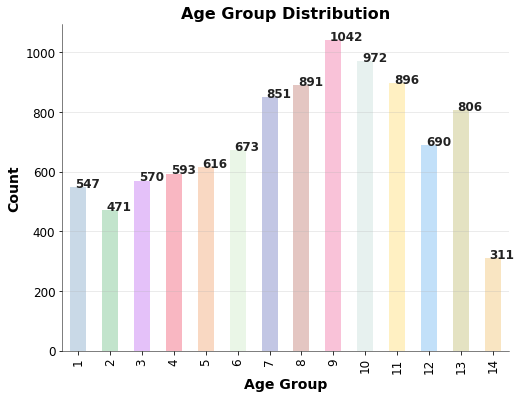

In [82]:
# The following age distribution is taken from the BRFSS_code book under the section '_AGE5YR'
age_groups = {1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49', 
              7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 11: '70-74', 12: '75-79',
              13: '80-99', 14: 'Under 18'}

# Changing the Age column from numeric to Categorical by adding the new column "age_groups"
df_IN_Health['age_groups'] = df_IN_Health['x.ageg5yr'].map(age_groups)

# Finding the percentage of each age group

percentage_counts = df_IN_Health['x.ageg5yr'].value_counts() 
percentage_counts = percentage_counts.sort_index()
colors = ['#C9D9E7', '#C2E4CC', '#E4C1F9', '#F9B7C2', '#F9D8C2', '#EAF6E7', '#C2C6E4',
          '#E4C6C2', '#F9C2D8', '#E7F1EF', '#FFF0C2', '#C2E0F9', '#E4E2C2', '#F9E5C2']

#Creating the bar graph for better understanding the age groups 

ax = percentage_counts.plot(kind='bar', color=colors, figsize=(8, 6))
ax.set_xlabel('Age Group', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.set_title('Age Group Distribution', fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.5)
for i, v in enumerate(percentage_counts):
    ax.text(i-0.1, v+0.3, f'{v}', color='#222222', fontsize=12, fontweight='bold')
# Display the chart
plt.show()

In [12]:
# remove columns having 70% null values
# df_IN_Health = df_IN_Health.drop(df_IN_Health.columns[df_IN_Health.isnull().mean() > 0.7 ],axis=1)
# df_IN_Health

## 1. Quality of Life

### 1.1 Poor or fair health: Percentage of adults reporting fair or poor health (age-adjusted)

In [13]:
# sns.countplot(data=df_IN_Health, x="genhlth")

<ipython-input-80-065404a9e948>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN_Health['general_health'] = df_IN_Health['genhlth'].map(general_health)


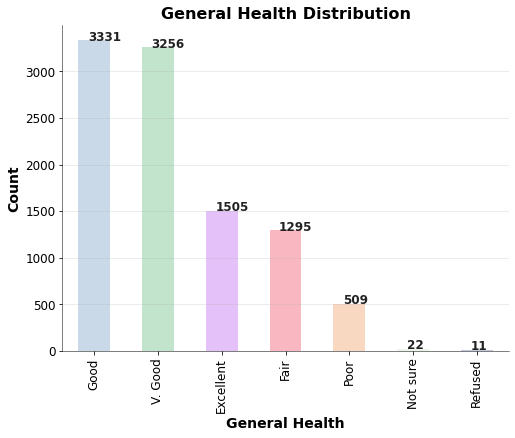

In [80]:
general_health = {1.0 :'Excellent', 2.0:'V. Good', 3.0:'Good', 4.0:'Fair', 5.0:'Poor', 7.0:'Not sure', 9.0:'Refused'}
df_IN_Health['general_health'] = df_IN_Health['genhlth'].map(general_health)
percentage_counts = df_IN_Health['general_health'].value_counts()
percentage_counts
#percentage_counts = percentage_counts.sort_index()
ax = percentage_counts.plot(kind='bar', color=colors, figsize=(8, 6))
ax.set_xlabel('General Health', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.set_title('General Health Distribution', fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.5)
for i, v in enumerate(percentage_counts):
    ax.text(i-0.1, v+0.3, f'{v}', color='#222222', fontsize=12, fontweight='bold')
# Display the chart
plt.show()

In [ ]:
# Total population of indiana is 6.2 million of them our sample data is 9929 out of which 509 people reported poor health 
# Calculating for the entire state 
# 

In [99]:
df_IN_Health

,idate,imonth,iday,iyear,ladult1,cadult1,genhlth,physhlth,menthlth,poorhlth,...,x.raceprv,x.ageg5yr,x.age65yr,x.age80,x.age.g,x.rfbmi5,x.smoker3,x.rfbing5,age_groups,general_health
84466,2192021,2,19,2021,1.0,NaN,4.0,10.0,88.0,10.0,...,1,8,1,58,5,2,4,1,55-59,Fair
84467,2252021,2,25,2021,1.0,NaN,2.0,88.0,88.0,NaN,...,1,7,1,54,4,1,4,1,50-54,V. Good
84468,2262021,2,26,2021,1.0,NaN,2.0,88.0,88.0,NaN,...,1,11,2,73,6,1,4,1,70-74,V. Good
84469,2212021,2,21,2021,1.0,NaN,2.0,88.0,88.0,NaN,...,1,2,1,26,2,2,4,1,25-29,V. Good
84470,2212021,2,21,2021,1.0,NaN,1.0,88.0,88.0,NaN,...,1,13,2,80,6,1,3,1,80-99,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94390,3212021,3,21,2021,NaN,1.0,2.0,88.0,15.0,88.0,...,1,10,2,69,6,2,3,1,65-69,V. Good
94391,6252021,6,25,2021,NaN,1.0,3.0,88.0,3.0,88.0,...,1,2,1,25,2,1,4,1,25-29,Good
94392,12082021,12,8,2021,NaN,1.0,3.0,88.0,7.0,88.0,...,1,4,1,37,3,1,2,1,35-39,Good
94393,12142021,12,14,2021,NaN,1.0,5.0,30.0,30.0,30.0,...,1,3,1,30,2,2,3,1,30-34,Poor


In [116]:
age_gen_counts = df_IN_Health.groupby(['age_groups', 'general_health']).size().reset_index(name='count')

In [117]:
age_gen_counts

,age_groups,general_health,count
0,18-24,Excellent,118
1,18-24,Fair,42
2,18-24,Good,170
3,18-24,Poor,6
4,18-24,V. Good,211
...,...,...,...
85,Under 18,Good,108
86,Under 18,Not sure,1
87,Under 18,Poor,5
88,Under 18,Refused,2


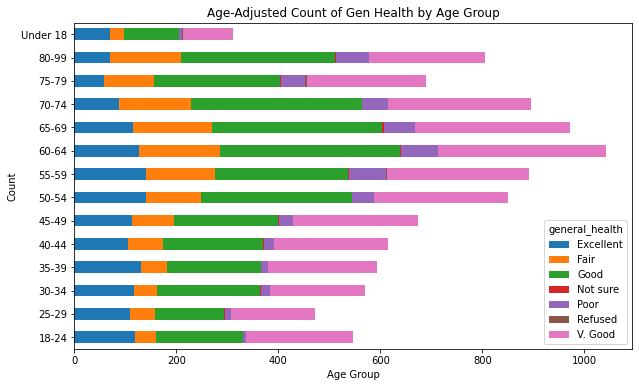

In [92]:
age_gen_counts_pivot = age_gen_counts.pivot(index='age_groups', columns='general_health', values='count')

# Plot the age-adjusted count graph with a stacked bar chart
age_gen_counts_pivot.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Age-Adjusted Count of Gen Health by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

In [121]:
age_gen_counts_pivot = age_gen_counts_pivot.fillna(0)

In [142]:
age_gen_counts_pivot.index

Index(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
       '60-64', '65-69', '70-74', '75-79', '80-99', 'Under 18'],
      dtype='object', name='age_groups')

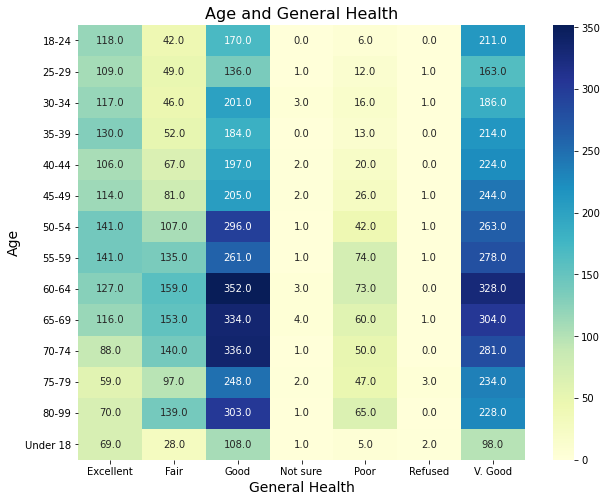

In [150]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fmt = '.1f'
sns.heatmap(age_gen_counts_pivot, annot=True, fmt=fmt, yticklabels = age_gen_counts_pivot.index, cmap='YlGnBu')
# Set the plot title
plt.title('Distribution of age and general health')
plt.title('Age and General Health', fontsize=16)
plt.xlabel('General Health', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.yticks(rotation=0, ha='right')
# Display the plot
plt.show()

In [83]:
genheal = pd.crosstab(df_IN_Health['age_groups'], df_IN_Health['general_health'],  normalize='index')

In [84]:
genheal
age_gen_health = genheal.reset_index()

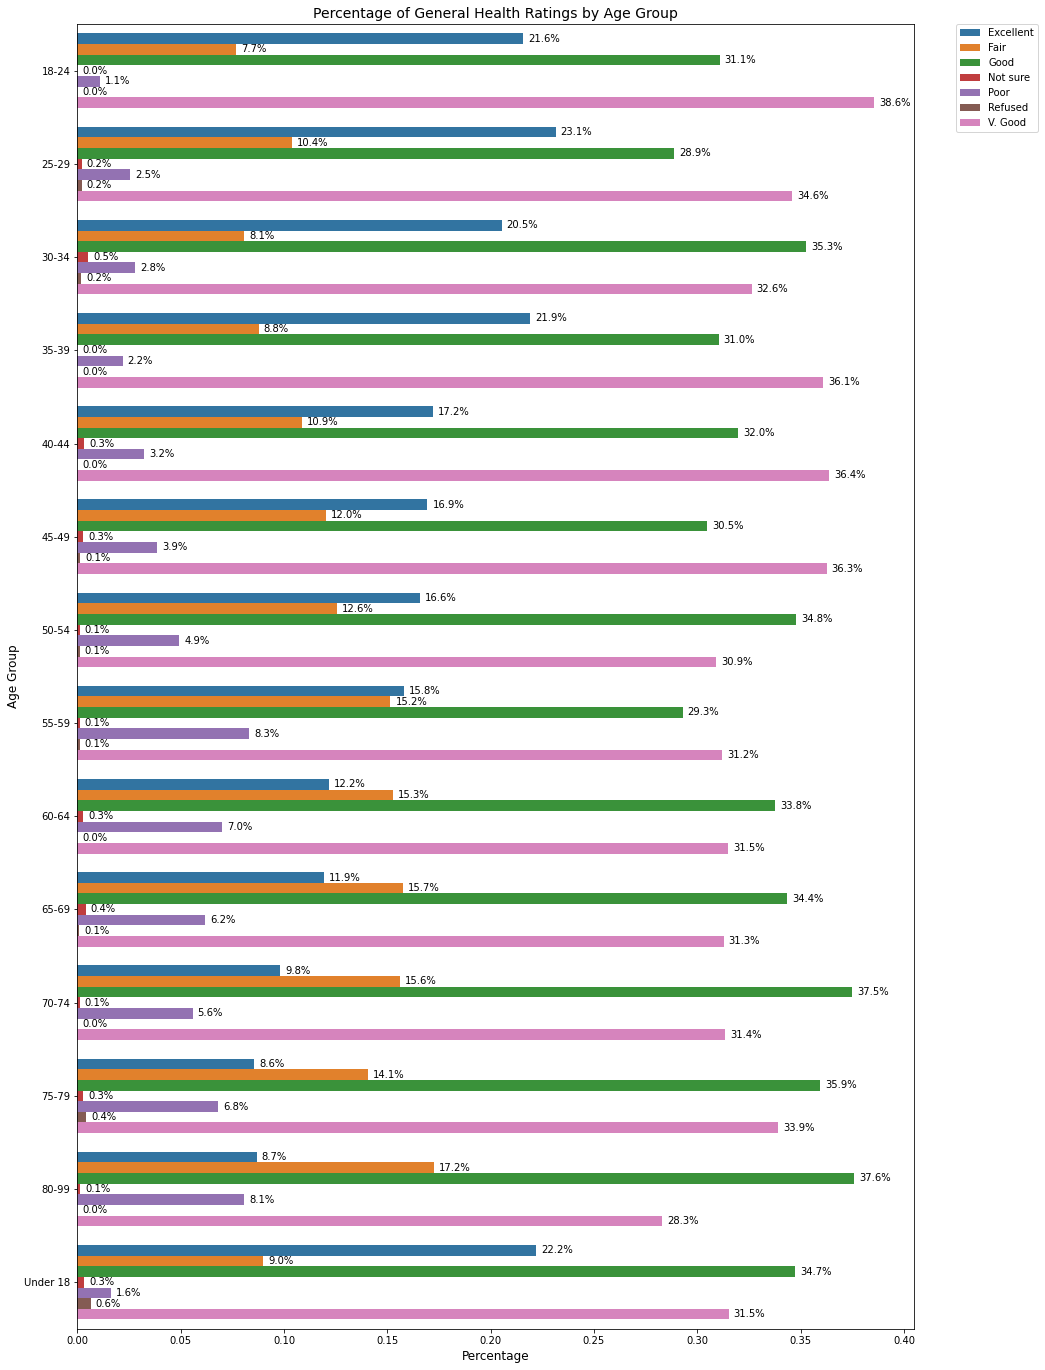

In [94]:
age_gen_health_melted = pd.melt(age_gen_health, id_vars=['age_groups'], var_name='general_health', value_name='percentage')
plt.figure(figsize=(15, 24))
sns.barplot(x='percentage', y='age_groups', hue='general_health', data=age_gen_health_melted, orient='h')

# add labels and title
plt.title('Percentage of General Health Ratings by Age Group', fontsize=14)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Age Group', fontsize=12)

# add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# add percentage values on each bar
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(p.get_width()*100)
    plt.gca().annotate(percentage, (p.get_width(), p.get_y()+0.5*p.get_height()), xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

plt.show()

In [50]:
def age_adjusted_percentages(row):
    age_dist = row / row.sum()
    return (age_dist * 100) / age_dist.mean()

# Apply the age_adjusted_percentages function to each row of the contingency table
ct_age_adjusted = ct.apply(age_adjusted_percentages, axis=1)

In [51]:
ct_age_adjusted

general_health,Excellent,Fair,Good,Not sure,Poor,Refused,V. Good
age_groups,,,,,,,
18-24,151.005484,53.747715,217.550274,0.000000,7.678245,0.000000,270.018282
25-29,161.995754,72.823779,202.123142,1.486200,17.834395,1.486200,242.250531
30-34,143.684211,56.491228,246.842105,3.684211,19.649123,1.228070,228.421053
35-39,153.456998,61.382799,217.200675,0.000000,15.345700,0.000000,252.613828
40-44,120.454545,76.136364,223.863636,2.272727,22.727273,0.000000,254.545455
45-49,118.573551,84.249629,213.224368,2.080238,27.043091,1.040119,253.789004
50-54,115.981199,88.014101,243.478261,0.822562,34.547591,0.822562,216.333725
55-59,110.774411,106.060606,205.050505,0.785634,58.136925,0.785634,218.406285
60-64,85.316699,106.813820,236.468330,2.015355,49.040307,0.000000,220.345489


# Poor physical health days Average number of physically unhealthy days reported in past 30 days (age-adjusted).

In [154]:
df_IN_Health['poorhlth'] = df_IN_Health['poorhlth'].replace({88: np.nan, 77: np.nan, 99: np.nan})

<ipython-input-154-079181eb0df0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN_Health['poorhlth'] = df_IN_Health['poorhlth'].replace({88: np.nan, 77: np.nan, 99: np.nan})


In [172]:
df_heatmap = df_IN_Health.groupby('age_groups')['poorhlth'].mean().reset_index()

In [173]:
df_heatmap

,age_groups,poorhlth
0,18-24,8.440594
1,25-29,9.227848
2,30-34,8.837500
3,35-39,9.156463
4,40-44,10.662162
5,45-49,11.284024
6,50-54,11.277056
7,55-59,13.687500
8,60-64,13.632184
9,65-69,13.544118


# iii. Poor mental health days Average number of mentally unhealthy days reported in past 30 days (age-adjusted).

In [179]:
df_IN_Health['menthlth'] = df_IN_Health['menthlth'].replace({88: np.nan, 77: np.nan, 99: np.nan})

<ipython-input-179-614b43fc00df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN_Health['menthlth'] = df_IN_Health['menthlth'].replace({88: np.nan, 77: np.nan, 99: np.nan})


In [180]:
df_heatmap = df_IN_Health.groupby('age_groups')['menthlth'].mean().reset_index()
df_heatmap

,age_groups,menthlth
0,18-24,12.123894
1,25-29,12.031034
2,30-34,11.288462
3,35-39,11.249147
4,40-44,11.754386
5,45-49,11.242537
6,50-54,10.532934
7,55-59,13.224432
8,60-64,11.982090
9,65-69,10.065455


# Tobacco Use



# i. Adult smoking Percentage of adults who are current smokers (age-adjusted).

In [184]:
df_IN_Health['x.smoker3'].value_counts()

4    5374
3    2488
1    1057
9     657
2     353
Name: x.smoker3, dtype: int64

In [185]:
df_IN_Health['smoker_status'] = df_IN_Health['x.smoker3'].replace({1: 'Yes', 2: 'Yes', 3: 'No',4:'No',9:np.nan})

<ipython-input-185-93229dd6e434>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN_Health['smoker_status'] = df_IN_Health['x.smoker3'].replace({1: 'Yes', 2: 'Yes', 3: 'No',4:'No',9:np.nan})


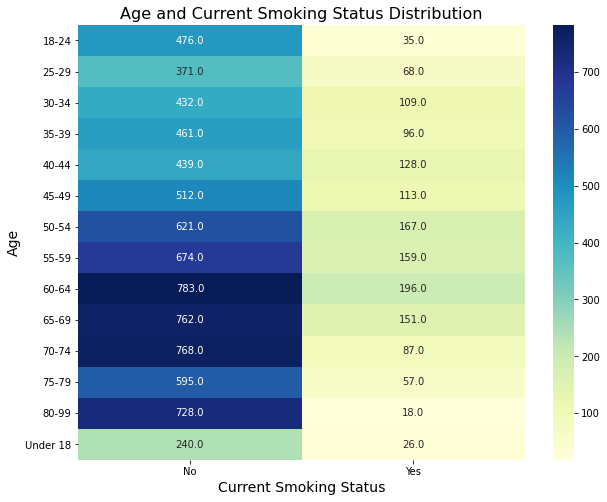

In [188]:
age_smoke_counts = df_IN_Health.groupby(['age_groups', 'smoker_status']).size().reset_index(name='count')
age_smoke_counts_pivot = age_smoke_counts.pivot(index='age_groups', columns='smoker_status', values='count')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fmt = '.1f'
sns.heatmap(age_smoke_counts_pivot, annot=True, fmt=fmt, yticklabels = age_smoke_counts_pivot.index, cmap='YlGnBu')
# Set the plot title
plt.title('Distribution of age and general health')
plt.title('Age and Current Smoking Status Distribution', fontsize=16)
plt.xlabel('Current Smoking Status', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.yticks(rotation=0, ha='right')
# Display the plot
plt.show()

# 3. Diet and Exercise

# i. Adult obesity Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted).

 # ii. Physical inactivity	Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted). 

In [191]:
df_IN_Health['x.rfbmi5'].value_counts()

2    6130
1    2534
9    1265
Name: x.rfbmi5, dtype: int64

In [ ]:
'''
1: No
2: Yes
9: Refused
'''

In [193]:
df_IN_Health['exerany2'].value_counts()


1.0    7251
2.0    2648
7.0      20
9.0      10
Name: exerany2, dtype: int64

In [194]:
'''
1: Yes
2: No
7: Not sure
9: Refused
'''

'\n1: Yes\n2: No\n7: Not sure\n9: Refused\n'

In [195]:
df_IN_Health['bmi_g30'] = df_IN_Health['x.rfbmi5'].replace({1: 'No', 2: 'Yes',9:np.nan})
df_IN_Health['in_phy'] = df_IN_Health['exerany2'].replace({1: 'Yes', 2: 'No',7:np.nan,9:np.nan})

<ipython-input-195-f4a8272340eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN_Health['bmi_g30'] = df_IN_Health['x.rfbmi5'].replace({1: 'No', 2: 'Yes',9:np.nan})
<ipython-input-195-f4a8272340eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN_Health['in_phy'] = df_IN_Health['exerany2'].replace({1: 'Yes', 2: 'No',7:np.nan,9:np.nan})


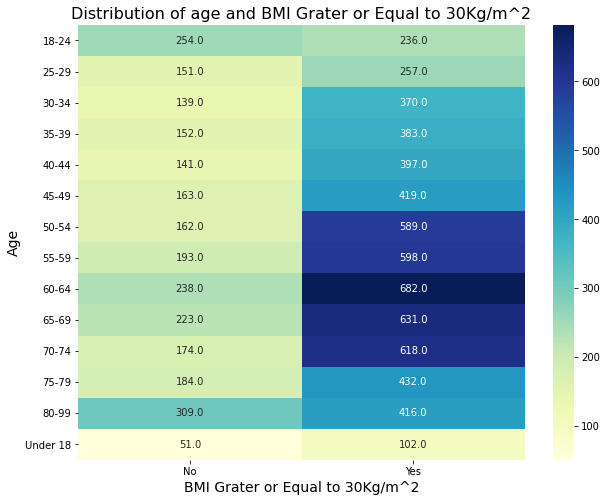

In [196]:
age_bmi_counts = df_IN_Health.groupby(['age_groups', 'bmi_g30']).size().reset_index(name='count')
age_bmi_counts_pivot = age_bmi_counts.pivot(index='age_groups', columns='bmi_g30', values='count')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fmt = '.1f'
sns.heatmap(age_bmi_counts_pivot, annot=True, fmt=fmt, yticklabels = age_bmi_counts_pivot.index, cmap='YlGnBu')
# Set the plot title
plt.title('Distribution of age and BMI Grater or Equal to 30Kg/m^2',fontsize=16 )
#plt.title('Age and Current Smoking Status Distribution', fontsize=16)
plt.xlabel('BMI Grater or Equal to 30Kg/m^2', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.yticks(rotation=0, ha='right')
# Display the plot
plt.show()

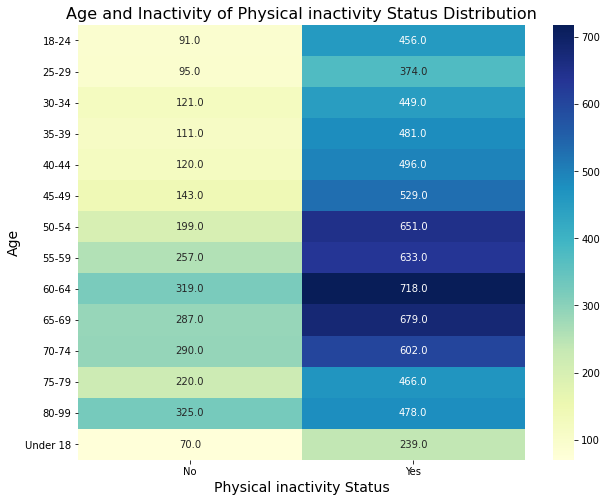

In [199]:
age_phy_counts = df_IN_Health.groupby(['age_groups', 'in_phy']).size().reset_index(name='count')
age_phy_counts_pivot = age_phy_counts.pivot(index='age_groups', columns='in_phy', values='count')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fmt = '.1f'
sns.heatmap(age_phy_counts_pivot, annot=True, fmt=fmt, yticklabels = age_phy_counts_pivot.index, cmap='YlGnBu')
# Set the plot title
plt.title('Age and Inactivity of Physical inactivity Status Distribution', fontsize=16)
plt.xlabel('Physical inactivity Status', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.yticks(rotation=0, ha='right')
# Display the plot
plt.show()

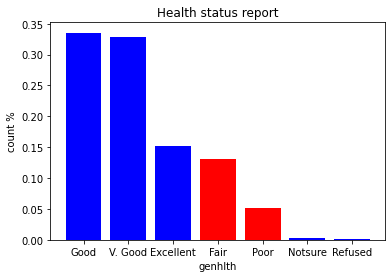

In [14]:
genhlth_dict = dict(df_IN_Health['genhlth'].value_counts()/len(df_IN_Health))

# print(genhlth_key)
# print(genhlth_dict)

new_dict = {}
for i in genhlth_dict:
    new_dict[genhlth_key[i]] = genhlth_dict[i]
# print('\nUpdated dict:', new_dict)

import matplotlib.pyplot as plt
names = list(new_dict.keys())
values = list(new_dict.values())

colors = ['red' if ((xi == 'Fair') or (xi == 'Poor')) else 'blue' for xi in names]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars with different colors
ax.bar(names, values, color=colors)

# Set the labels and title
ax.set_xlabel('genhlth')
ax.set_ylabel('count %')
ax.set_title('Health status report')

# Show the plot
plt.show()

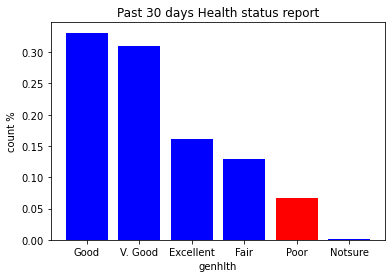

In [30]:
df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

genhlth_dict = dict(df_IN_Health_30['genhlth'].value_counts()/len(df_IN_Health_30))
genhlth_key = {1.0 :'Excellent', 2.0:'V. Good', 3.0:'Good', 4.0:'Fair', 5.0:'Poor', 7.0:'Notsure', 9.0:'Refused'}
# print(genhlth_key)
# print(genhlth_dict)

new_dict = {}
for i in genhlth_dict:
    new_dict[genhlth_key[i]] = genhlth_dict[i]
# print('\nUpdated dict:', new_dict)

import matplotlib.pyplot as plt
names = list(new_dict.keys())
values = list(new_dict.values())

colors = ['red' if (xi == 'Poor') else 'blue' for xi in names]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars
bars = ax.bar(names, values)

# Plot the bars with different colors
ax.bar(names, values, color=colors)

# Set the labels and title
ax.set_xlabel('genhlth')
ax.set_ylabel('count %')
ax.set_title('Past 30 days Health status report')

# Show the plot
plt.show()

### 1.2. Poor physical health days: Average number of physically unhealthy days reported in past 30 days (age-adjusted).

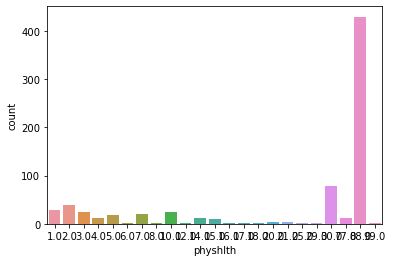

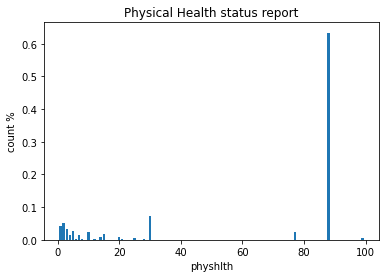

In [31]:
# physhlth - Poor physical health days

df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

genhlth_dict = dict(df_IN_Health_30['physhlth'].value_counts()/len(df_IN_Health_30))

sns.countplot(data=df_IN_Health_30, x="physhlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''


genhlth_dict = dict(df_IN_Health['physhlth'].value_counts()/len(df_IN_Health))


import matplotlib.pyplot as plt
names = list(genhlth_dict.keys())
values = list(genhlth_dict.values())

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars with different colors
ax.bar(names, values)

# Set the labels and title
ax.set_xlabel('physhlth')
ax.set_ylabel('count %')
ax.set_title('Physical Health status report')

# Show the plot
plt.show()

### 1.3. Poor mental health days: Average number of mentally unhealthy days reported in past 30 days (age-adjusted).

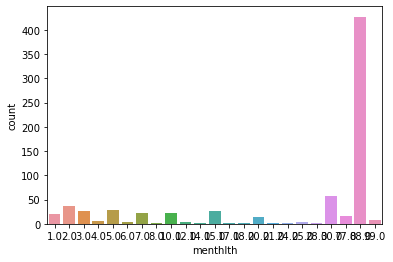

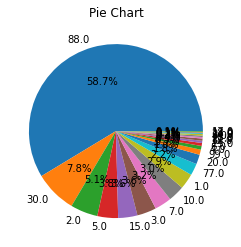

In [32]:
# menthlth - Poor mental health days

df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

genhlth_dict = dict(df_IN_Health_30['menthlth'].value_counts()/len(df_IN_Health_30))

sns.countplot(data=df_IN_Health_30, x="menthlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''

import matplotlib.pyplot as plt
names = list(genhlth_dict.keys())
values = list(genhlth_dict.values())


# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the pie chart
ax.pie(values, labels=names, autopct='%1.1f%%')

# Set the title
ax.set_title('Pie Chart')

# Show the plot
plt.show()

## 2. Tobacco USe

### 2.1. Adult Smoking: Percentage of adults who are current smokers (age-adjusted).

In [33]:
# sns.countplot(data=df_IN_Health, x="x.smoker3")

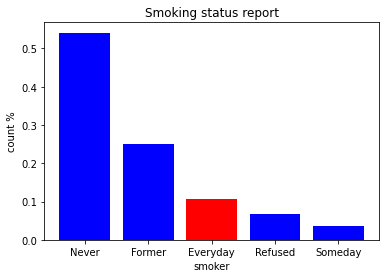

In [34]:
genhlth_dict = dict(df_IN_Health['x.smoker3'].value_counts()/len(df_IN_Health))
genhlth_key = {1 :'Everyday', 2:'Someday', 3:'Former', 4:'Never', 9:'Refused'}
# print(genhlth_key)
# print(genhlth_dict)

new_dict = {}
for i in genhlth_dict:
    new_dict[genhlth_key[i]] = genhlth_dict[i]
# print('\nUpdated dict:', new_dict)

import matplotlib.pyplot as plt
names = list(new_dict.keys())
values = list(new_dict.values())

# plt.bar(range(len(new_dict)), values, tick_label=names)
# plt.xlabel('smoker')
# plt.ylabel('count (%)')
# plt.title('Smoking status report')
# plt.show()


colors = ['red' if (xi == 'Everyday') else 'blue' for xi in names]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars
bars = ax.bar(names, values)

# Plot the bars with different colors
ax.bar(names, values, color=colors)

# Set the labels and title
ax.set_xlabel('smoker')
ax.set_ylabel('count %')
ax.set_title('Smoking status report')

# Show the plot
plt.show()

## 3. Diet & Exercise

### 3.1 Adult Obesity - BMI > 25: Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted).

'\n1: No\n2: Yes\n9: Refused\n'

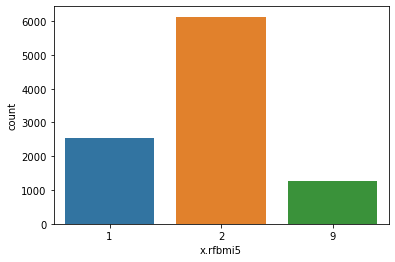

In [35]:
sns.countplot(data=df_IN_Health, x="x.rfbmi5")
'''
1: No
2: Yes
9: Refused
'''

### 3.2 Physical inactivity: Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).

'\n1: Yes\n2: No\n7: Not sure\n9: Refused\n'

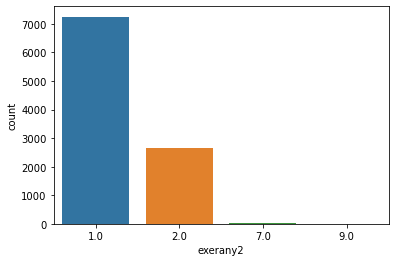

In [36]:
# exerany2
sns.countplot(data=df_IN_Health, x="exerany2")

'''
1: Yes
2: No
7: Not sure
9: Refused
'''

## 4. Alcohol & Drug Use

### 4.1 Excessive Drinking: Percentage of adults reporting binge or heavy drinking (age-adjusted)

{1: 79.0, 2: 11.0, 9: 9.0}


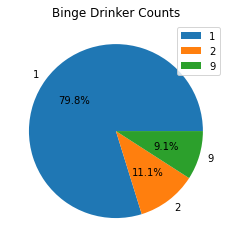

***There are only 11.1% who reported binge drinking


In [56]:
# Binge drinkers (males having five or more drinks on one occasion, females having four or more drinks on one occasion)
binge_dict = dict(round(df_IN_Health['x.rfbing5'].value_counts()/len(df_IN_Health)*100))
print(binge_dict)

plt.pie(binge_dict.values(), labels=binge_dict.keys(), autopct='%1.1f%%')

# set the x and y axis labels
plt.legend()

# set the plot title
plt.title('Binge Drinker Counts')

# display the plot
plt.show()

'''
1: No
2: Yes
9: Refused
'''

print('***There are only 11.1% who reported binge drinking')

In [44]:
# Considering all types of alcoholic beverages, how many times during the past 30 days did you have 5 or more drinks for men or 4 or more drinks for women on an occasion?

# sns.countplot(data=df_IN_Health, x="drnk3ge5")
'''
1-76: No of days
88:   None
77:   Not sure
99:   Refused
'''

'\n1-76: No of days\n88:   None\n77:   Not sure\n99:   Refused\n'

## - Weight Factor ~ 6.8 M

In [98]:
# weight features

print(df_Indiana[['x.llcpwt2']].sum())
print(df_Indiana[['x.llcpwt']].sum())
print(df_Indiana[['x.cllcpwt']].sum())

total=(1565837+5262173)
print('\nLLCPWT ~6.8 M:', total)

x.llcpwt2    5262173.0
dtype: float64
x.llcpwt    5262173.0
dtype: float64
x.cllcpwt    1565837.0
dtype: float64

LLCPWT ~6.8 M: 6828010


## - Reference Var

### Age Var | Filter: 55+, 55-64, 65-84, 85+
AGEG5YR (5 yer group)
CADULT1 (1: yes 18>, Blank: not asked/missing) landline
LADULT1 (1: yes, 2: Terminate phone cal, Blank: missing) cellphone

### Race Var | Filter: white, black, hispanic, other
IMPRACE (imputed if not answered), RACE, RACEGR3
white, black, asian, american, hispanic, other
